In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('pictures/yellow-cropped.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [79]:
# I measured this values, they are not random

#lower = np.array([6, 0, 220])
#upper= np.array([179, 223, 255])

lower = np.array([0, 0, 185])
upper = np.array([179, 155, 255])

In [80]:
mask = cv2.inRange(hsv_img, lower, upper)

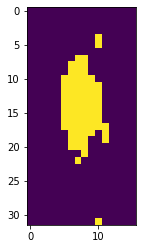

In [81]:
plt.imshow(mask)

In [82]:
contours, hierarchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    # If we have at least one contour, look through each one and pick the biggest
if len(contours)>0:
    largest = 0
    area = 0
    for i in range(len(contours)):
        # get the area of the ith contour
        temp_area = cv2.contourArea(contours[i])
        # if it is the biggest we have seen, keep it
        if temp_area > area:
            area = temp_area
            largest = i
    # Compute the coordinates of the center of the largest contour
    coordinates = cv2.moments(contours[largest])
biggest_area = cv2.contourArea(contours[largest])
print('Area', area)
target_y = int(coordinates['m01']/coordinates['m00'])
print(target_y)


Area 51.0
13


In [77]:
areas = img.shape[0] / 3

if target_y < areas:
    print('Red')
elif target_y > areas and target_y < areas * 2:
    print('Yellow')
elif target_y > areas * 2:
    print('Green')

Red
